In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import json

In [46]:
df = pd.read_csv('../data/interim/df_final.csv')

In [47]:
# JSON file source
ruta_json = "../data/json_files/full_var_dict.json"

# loading JSON file
with open(ruta_json, 'r') as archivo:
    varijson = json.load(archivo)

In [48]:
def parse_json(columna):
    categories = list(varijson[columna]['diccionario'].values())
    categories = [str(cat) for cat in categories]

    values=list(varijson[columna]['diccionario'].keys())
    values = [int(cat) for cat in values]
    
    title = varijson[columna]['Descripción']

    return values, categories, title

In [49]:
def percentage_dep_anx (valor):
    counts = df.groupby([valor, 'dep_anx']).size()
    counts_df = counts.unstack()
    percentage_df = counts_df.div(counts_df.sum(axis=1), axis=0) * 100
    print(percentage_df)

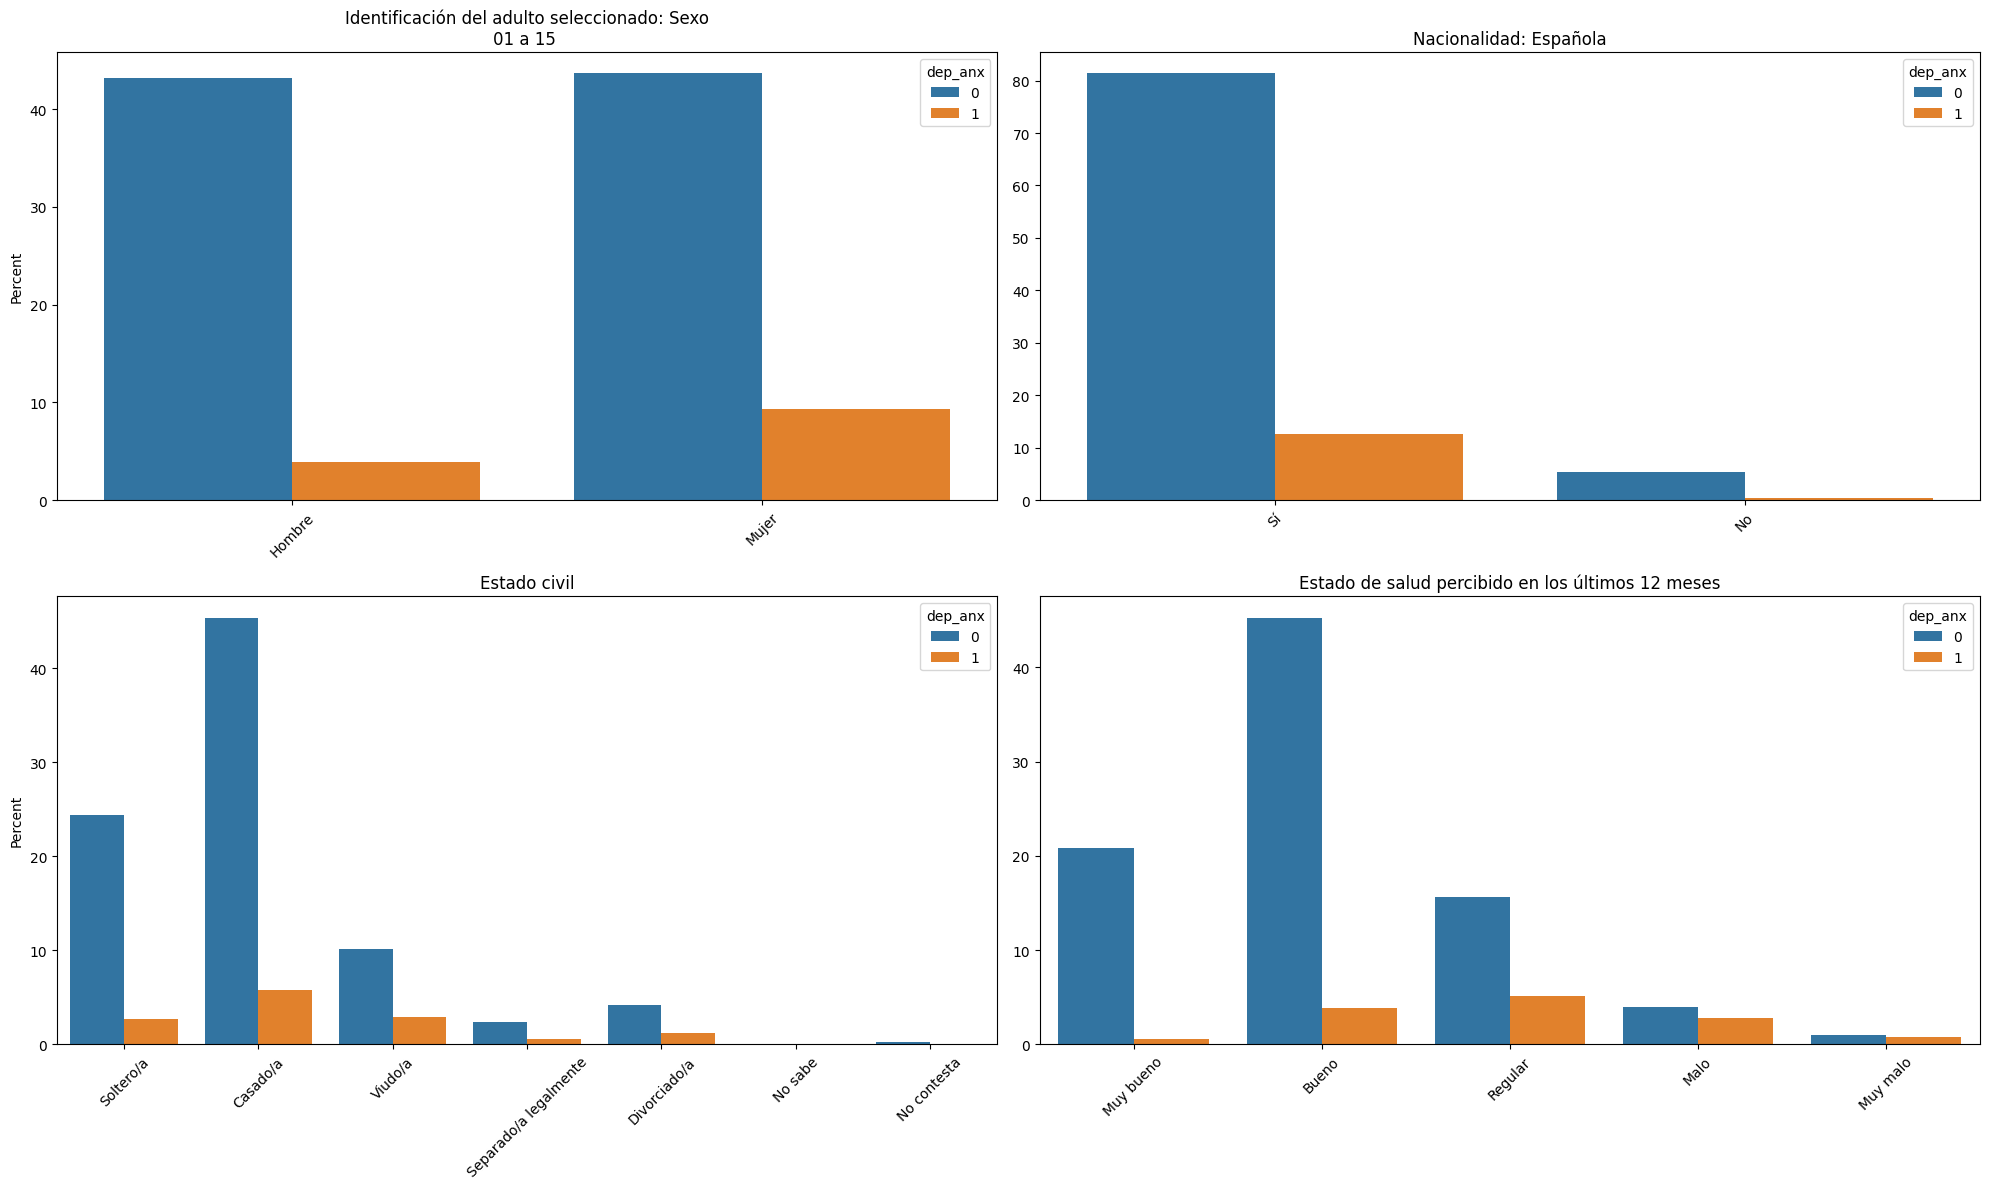

Target percentages:
dep_anx          0          1
SEXOa                        
1.0      91.742060   8.257940
2.0      82.443075  17.556925
dep_anx          0          1
E2_1a                        
1.0      86.501590  13.498410
2.0      91.856925   8.143075
dep_anx           0          1
E4b                           
1.0       90.112096   9.887904
2.0       88.682417  11.317583
3.0       77.658840  22.341160
4.0       80.461538  19.538462
5.0       78.021978  21.978022
8.0      100.000000        NaN
9.0       92.063492   7.936508
dep_anx          0          1
G21                          
1.0      97.128378   2.871622
2.0      92.111326   7.888674
3.0      75.375572  24.624428
4.0      58.941728  41.058272
5.0      56.641604  43.358396


In [50]:
vars=['SEXOa','E2_1a', 'E4b', 'G21']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(20, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=45) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
    percentage_dep_anx(i)

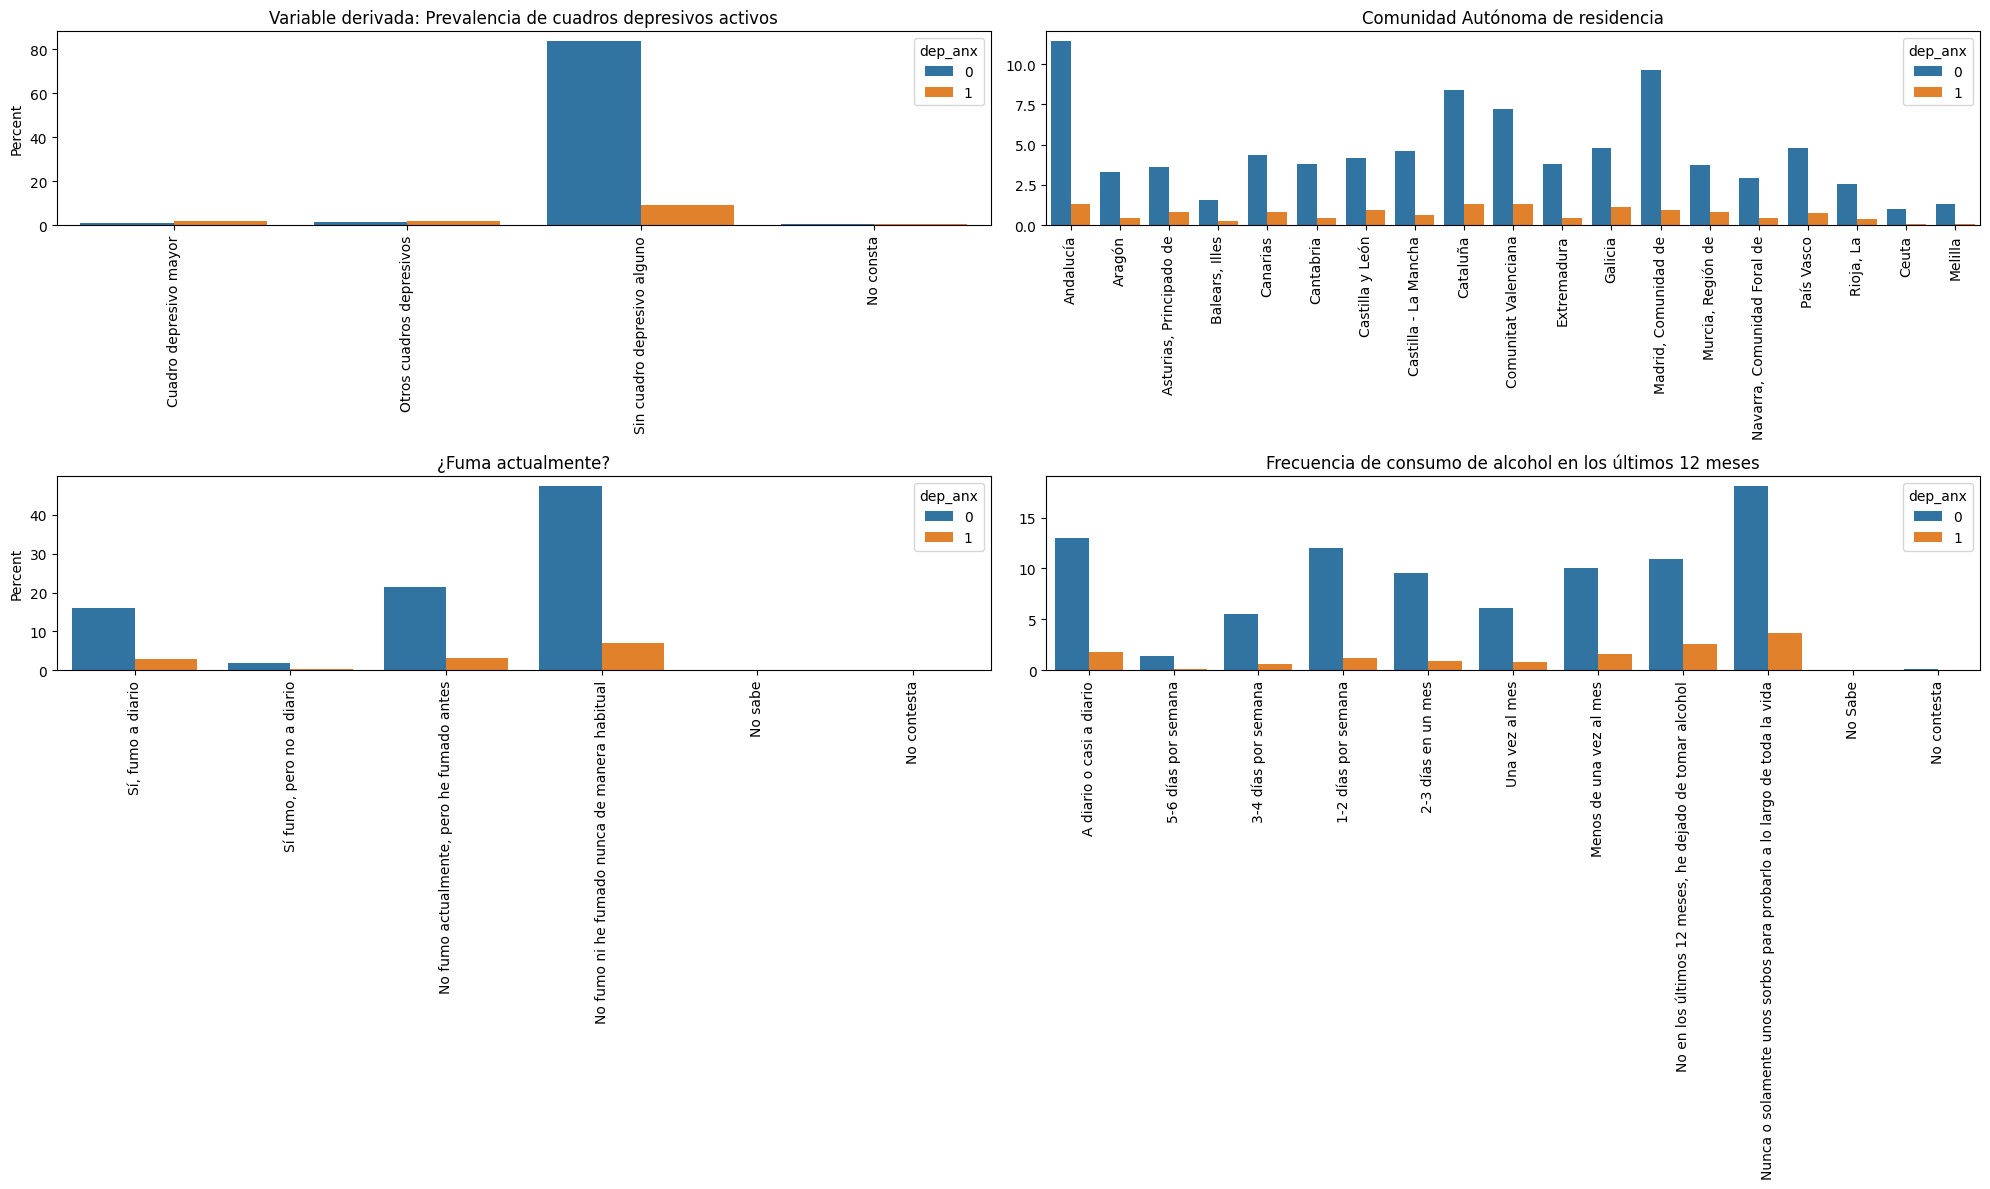

Target percentages:
dep_anx                     0          1
CUADROS_DEPRESIVOS                      
1.0                 28.064516  71.935484
2.0                 44.113667  55.886333
3.0                 90.301231   9.698769
9.0                 65.243902  34.756098
dep_anx          0          1
CCAA                         
1.0      89.680851  10.319149
2.0      88.915956  11.084044
3.0      81.307457  18.692543
4.0      85.858586  14.141414
5.0      84.007030  15.992970
6.0      90.096878   9.903122
7.0      81.761566  18.238434
8.0      88.568935  11.431065
9.0      86.529467  13.470533
10.0     84.866310  15.133690
11.0     90.249187   9.750813
12.0     80.674847  19.325153
13.0     91.147400   8.852600
14.0     81.827210  18.172790
15.0     87.148594  12.851406
16.0     86.086249  13.913751
17.0     87.500000  12.500000
18.0     92.241379   7.758621
19.0     96.598639   3.401361
dep_anx          0          1
V121                         
1.0      84.370512  15.629488
2.0      88.91

In [56]:
vars=['CUADROS_DEPRESIVOS', 'CCAA','V121', 'W127']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(20, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=90) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
     percentage_dep_anx(i)

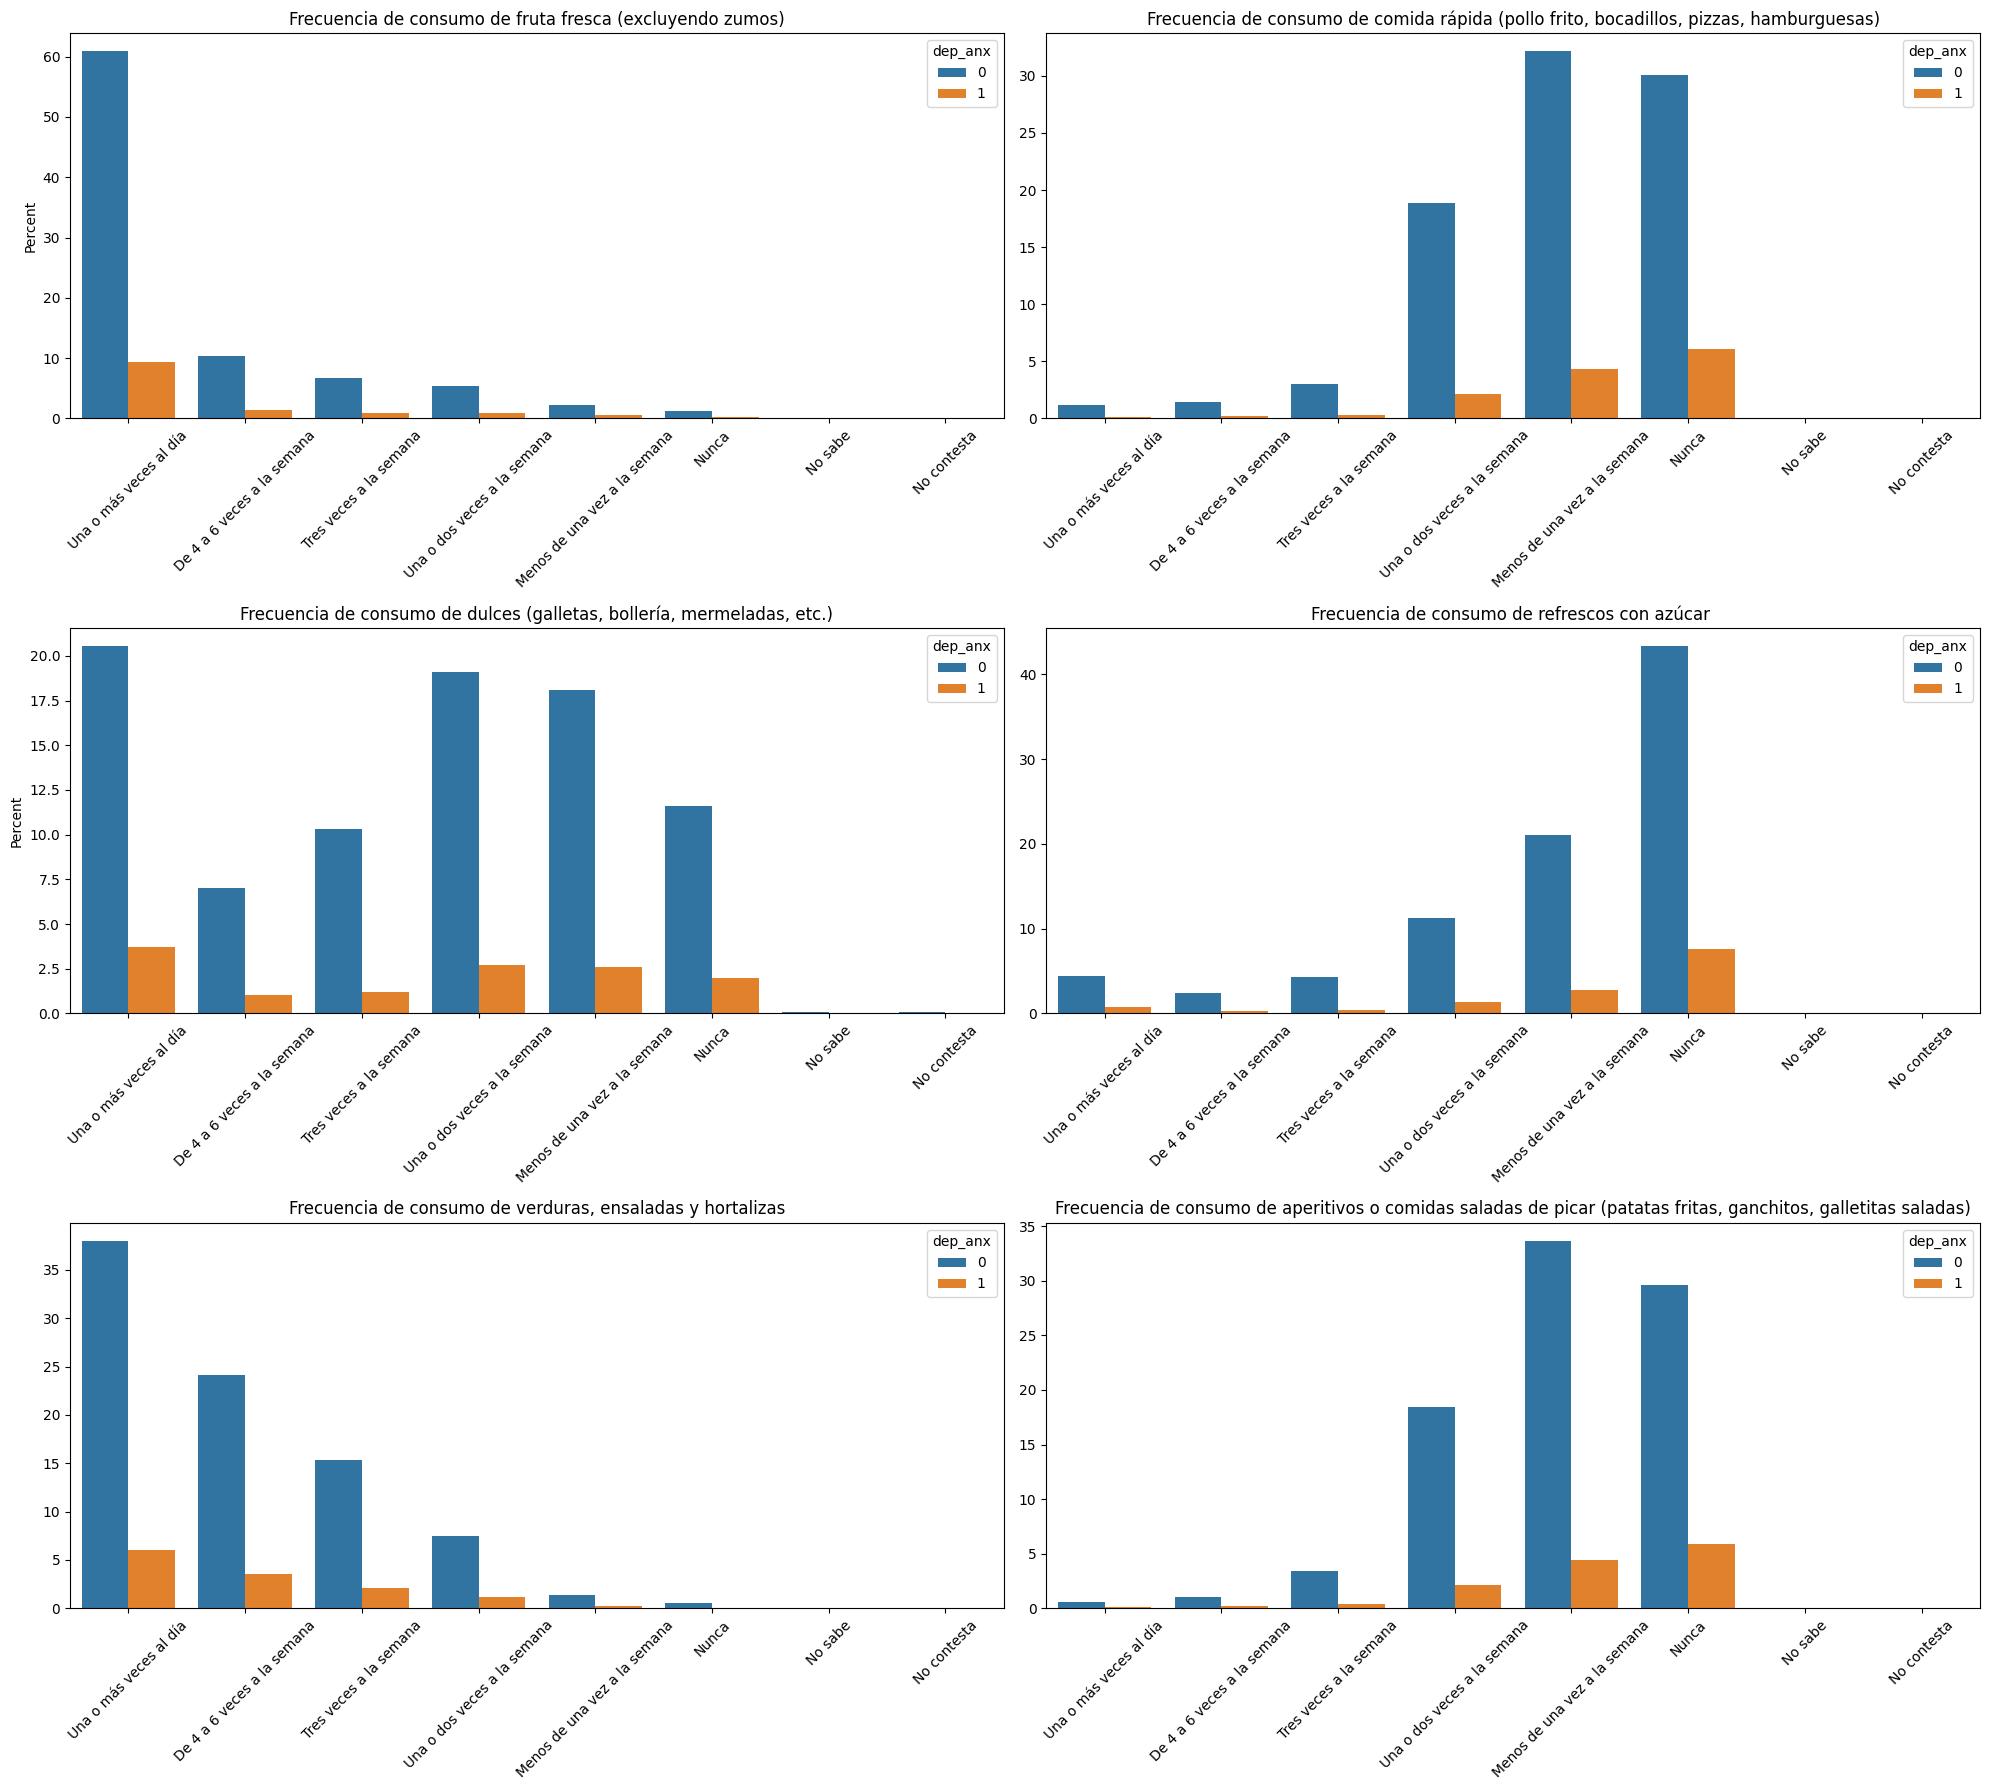

Target percentages:
dep_anx           0          1
U120_1                        
1.0       86.686009  13.313991
2.0       88.356698  11.643302
3.0       87.969029  12.030971
4.0       87.101449  12.898551
5.0       82.815057  17.184943
6.0       81.229773  18.770227
8.0      100.000000        NaN
9.0       83.333333  16.666667
dep_anx          0          1
U120_13                      
1.0      90.459364   9.540636
2.0      87.500000  12.500000
3.0      90.161725   9.838275
4.0      89.769546  10.230454
5.0      88.219212  11.780788
6.0      83.239171  16.760829
8.0      71.428571  28.571429
9.0      88.888889  11.111111
dep_anx          0          1
U120_11                      
1.0      84.703026  15.296974
2.0      87.457627  12.542373
3.0      89.704142  10.295858
4.0      87.676642  12.323358
5.0      87.461707  12.538293
6.0      85.509182  14.490818
8.0      73.333333  26.666667
9.0      85.714286  14.285714
dep_anx          0          1
U120_12                      
1.0      8

In [52]:
vars=['U120_1','U120_13', 'U120_11', 'U120_12', 'U120_7', 'U120_14']
cols=2
rows=((len(df[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(20, rows * 6))

for col, ax in zip(df[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.countplot(data=df, x=col, hue = 'dep_anx', ax=ax, stat='percent')
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_xticks(range(len(values)))
  ax.set_xticklabels(categories,  rotation=45) 

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
     percentage_dep_anx(i)

In [53]:
df_copy = df.query('V123 < 90 & EDADa < 105')

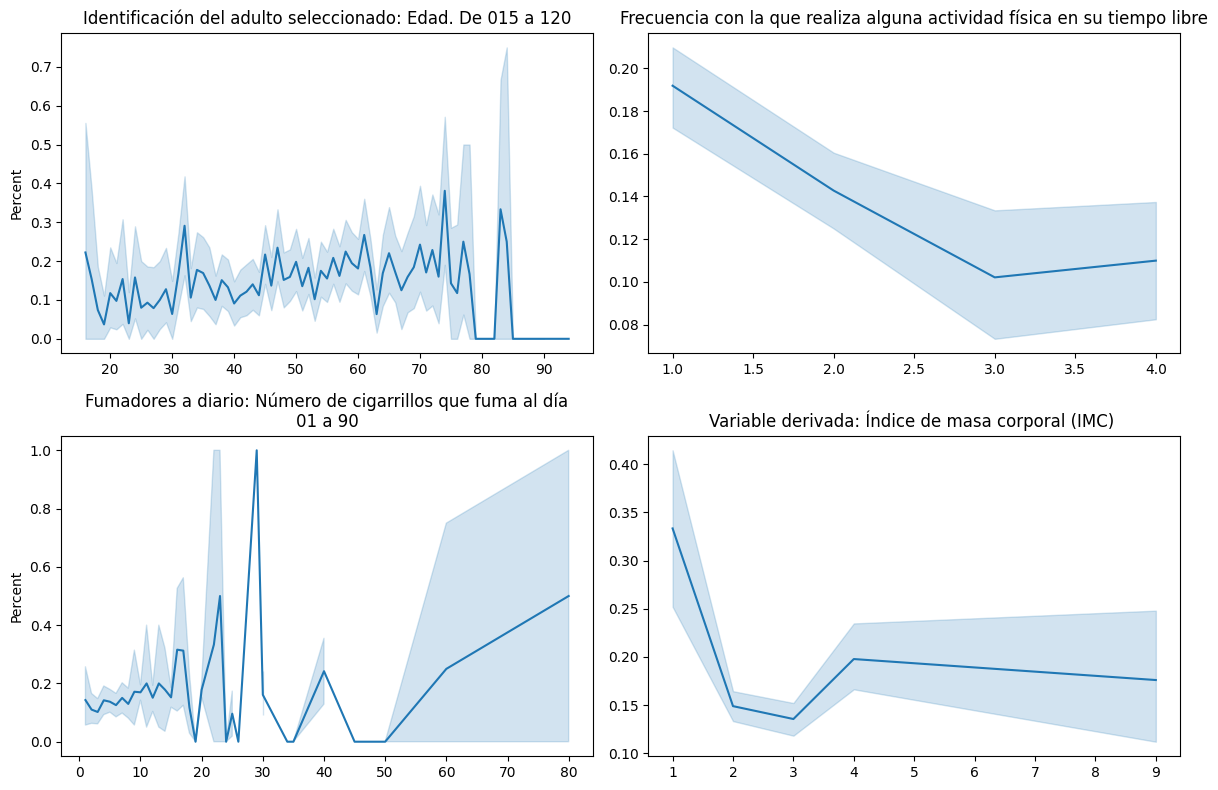

Target percentages:
dep_anx           0          1
EDADa                         
15.0      96.178344   3.821656
16.0      96.470588   3.529412
17.0      96.022727   3.977273
18.0      94.409938   5.590062
19.0      97.175141   2.824859
20.0      94.767442   5.232558
21.0      93.506494   6.493506
22.0      94.890511   5.109489
23.0      94.285714   5.714286
24.0      93.750000   6.250000
25.0      93.793103   6.206897
26.0      94.968553   5.031447
27.0      93.877551   6.122449
28.0      94.039735   5.960265
29.0      93.085106   6.914894
30.0      95.073892   4.926108
31.0      94.358974   5.641026
32.0      87.046632  12.953368
33.0      92.272727   7.727273
34.0      91.629956   8.370044
35.0      89.516129  10.483871
36.0      93.835616   6.164384
37.0      92.307692   7.692308
38.0      88.790560  11.209440
39.0      92.245989   7.754011
40.0      93.800539   6.199461
41.0      91.246684   8.753316
42.0      92.941176   7.058824
43.0      91.028446   8.971554
44.0      91.095890

In [57]:
vars=['EDADa', 'T112', 'V123', 'IMC']
cols=2
rows=((len(df_copy[vars].columns) - 1) // cols) + 1
fig, axis = plt.subplots(rows, cols, figsize=(12, rows * 4))

for col, ax in zip(df_copy[vars].columns , axis.flatten()):
  values, categories, title= parse_json(col)
  sns.lineplot(data=df_copy, x=col, y = 'dep_anx', ax=ax)
  ax.set_title(title)
  ax.set_ylabel('')
  ax.set_xlabel('')

axis[0,0].set_ylabel('Percent')
axis[1,0].set_ylabel('Percent')


#removing empty subplots
for i in range(len(df[vars]), len(axis.flatten())):
      fig.delaxes(axis.flatten()[i])

plt.tight_layout()
plt.show()

print("Target percentages:")
for i in vars:
    percentage_dep_anx(i)

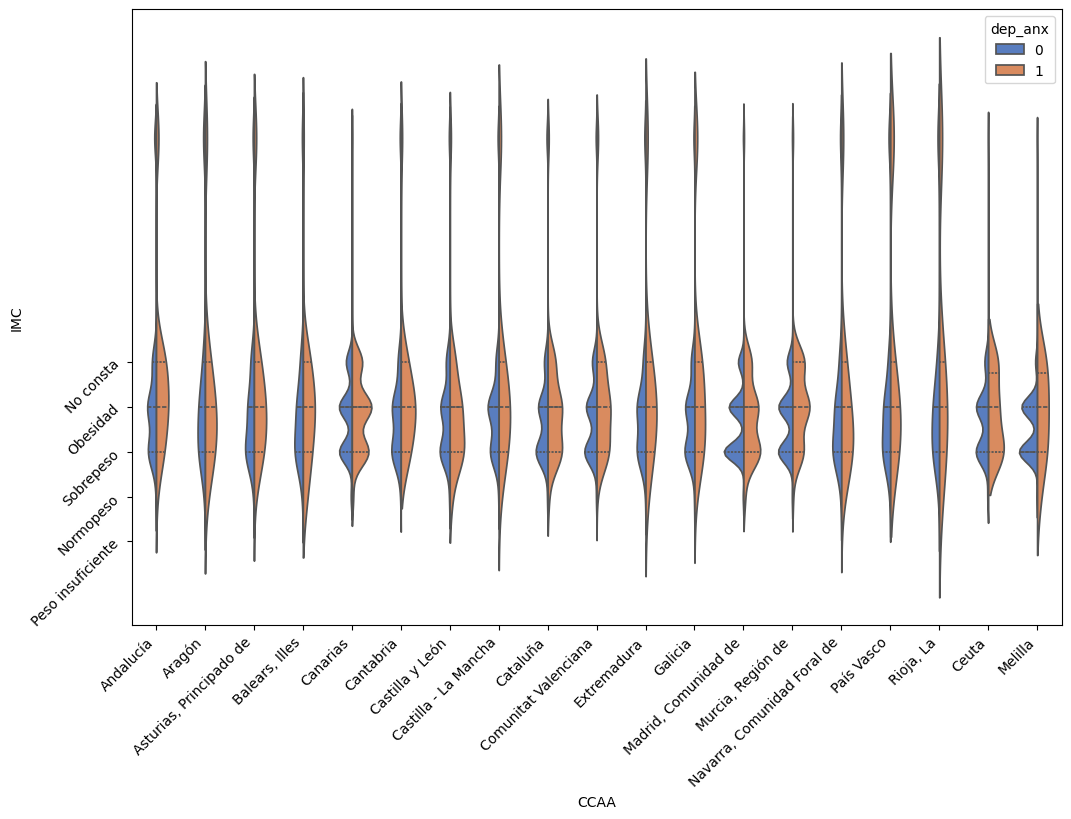

In [82]:
_,categories_CCAA, _ = parse_json('CCAA')
_,categories_IMC, _ = parse_json('IMC')

plt.figure(figsize=(12, 8))
sns.violinplot(x='CCAA', y='IMC', hue='dep_anx', data=df, palette="muted", split = True, inner = "quartile")
plt.yticks(range(len(categories_IMC)), categories_IMC, rotation=45, ha='right')
plt.xticks(range(len(categories_CCAA)), categories_CCAA, rotation=45, ha='right')
plt.show()

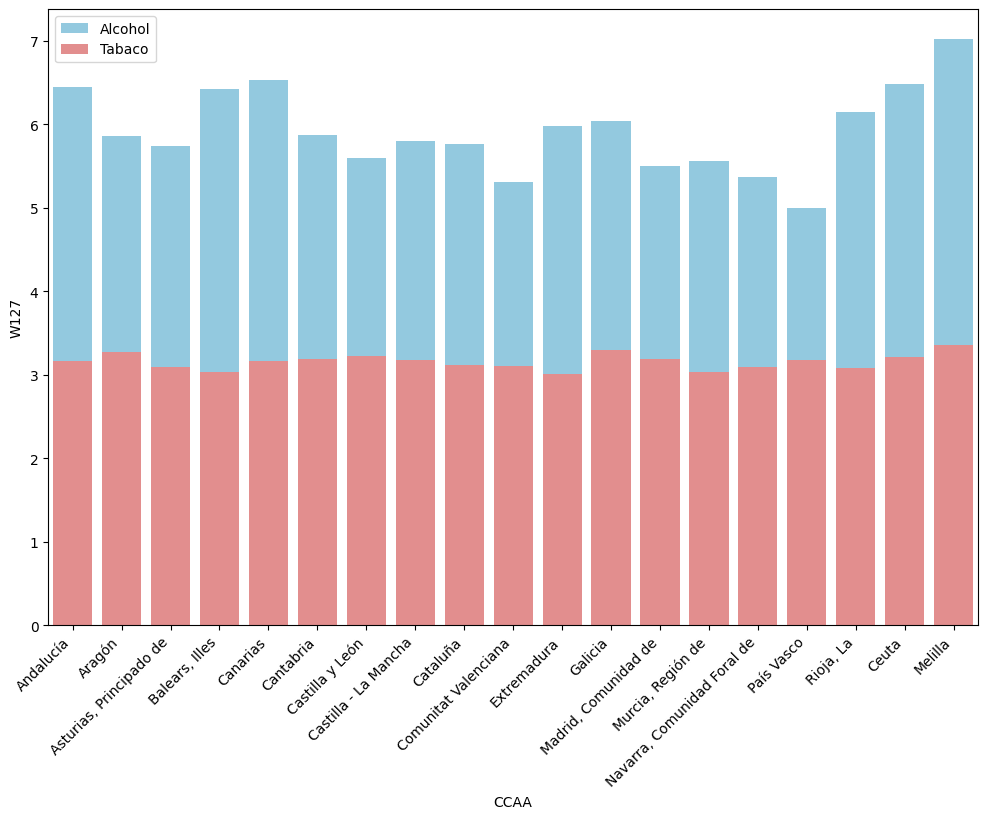

In [81]:
_,categories, _ = parse_json('CCAA')

# Crea un gráfico de barras para comparar la frecuencia de consumo de alcohol y tabaco por Comunidad Autónoma
plt.figure(figsize=(12, 8))

# Gráfico de barras combinado para frecuencia de consumo de alcohol y tabaco
sns.barplot(x='CCAA', y='W127', data=df, color='skyblue', errorbar=None, label='Alcohol')
sns.barplot(x='CCAA', y='V121', data=df, color='lightcoral', errorbar=None, label='Tabaco')
plt.xticks(range(len(categories)), categories, rotation=45, ha='right')
plt.show()
